In [199]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [200]:
# read training and testing data
train = pd.read_csv('../data/cs-training.csv')
test = pd.read_csv('../data/cs-test.csv')

In [201]:
train.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [202]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [203]:
# look at the head of the data
train = train.drop('Unnamed: 0', axis = 1)
train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.77,45,2,0.80,9120.00,13,0,6,0,2.00
1,0,0.96,40,0,0.12,2600.00,4,0,0,0,1.00
2,0,0.66,38,1,0.09,3042.00,2,1,0,0,0.00
3,0,0.23,30,0,0.04,3300.00,5,0,0,0,0.00
4,0,0.91,49,1,0.02,63588.00,7,0,1,0,0.00


In [204]:
# look at the head of test data
test = test.drop('Unnamed: 0', axis = 1)
test.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,nan,0.89,43,0,0.18,5700.00,4,0,0,0,0.00
1,nan,0.46,57,0,0.53,9141.00,15,0,4,0,2.00
2,nan,0.04,59,0,0.69,5083.00,12,0,1,0,2.00
3,nan,0.28,38,1,0.93,3200.00,7,0,2,0,0.00
4,nan,1.00,27,0,0.02,3865.00,4,0,0,0,1.00


In [205]:
# make column names lower case
train.columns = [i.replace("-", "").lower() for i in train.columns]
test.columns = [i.replace("-", "").lower() for i in test.columns]


In [206]:
train.head() 

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.77,45,2,0.80,9120.00,13,0,6,0,2.00
1,0,0.96,40,0,0.12,2600.00,4,0,0,0,1.00
2,0,0.66,38,1,0.09,3042.00,2,1,0,0,0.00
3,0,0.23,30,0,0.04,3300.00,5,0,0,0,0.00
4,0,0.91,49,1,0.02,63588.00,7,0,1,0,0.00


In [207]:
# clean data for training
train.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.77,45,2,0.80,9120.00,13,0,6,0,2.00
1,0,0.96,40,0,0.12,2600.00,4,0,0,0,1.00
2,0,0.66,38,1,0.09,3042.00,2,1,0,0,0.00
3,0,0.23,30,0,0.04,3300.00,5,0,0,0,0.00
4,0,0.91,49,1,0.02,63588.00,7,0,1,0,0.00


In [208]:
# statistical analysis
pd.options.display.float_format = '{:.2f}'.format
train.iloc[:,1:].describe()

,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
count,150000.00,150000.00,150000.00,150000.00,120269.00,150000.00,150000.00,150000.00,150000.00,146076.00
mean,6.05,52.30,0.42,353.01,6670.22,8.45,0.27,1.02,0.24,0.76
std,249.76,14.77,4.19,2037.82,14384.67,5.15,4.17,1.13,4.16,1.12
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.03,41.00,0.00,0.18,3400.00,5.00,0.00,0.00,0.00,0.00
50%,0.15,52.00,0.00,0.37,5400.00,8.00,0.00,1.00,0.00,0.00
75%,0.56,63.00,0.00,0.87,8249.00,11.00,0.00,2.00,0.00,1.00
max,50708.00,109.00,98.00,329664.00,3008750.00,58.00,98.00,54.00,98.00,20.00


In [209]:
target_freq = train['seriousdlqin2yrs'].value_counts()/len(train['seriousdlqin2yrs']) * 100
target_freq

0   93.32
1    6.68
Name: seriousdlqin2yrs, dtype: float64

So the conlcusion of the above analysis is that our data is very imbalanced. 93.32% of the loan borrowers didn't experience past dues of more than 90 days in the previous 2 years.

In [210]:
df = pd.DataFrame(target_freq).reset_index()
df

,index,seriousdlqin2yrs
0,0,93.32
1,1,6.68


In [211]:
df.columns = ['index', 'values']
df

,index,values
0,0,93.32
1,1,6.68


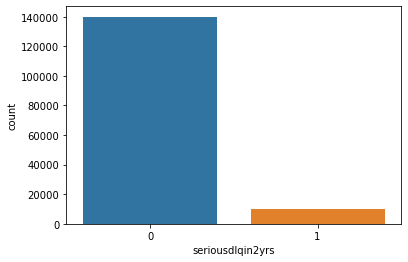

In [212]:
sns.countplot(x = train['seriousdlqin2yrs'], data = train)

In [213]:
# missing values analysis
train.isnull().sum()

seriousdlqin2yrs                            0
revolvingutilizationofunsecuredlines        0
age                                         0
numberoftime3059dayspastduenotworse         0
debtratio                                   0
monthlyincome                           29731
numberofopencreditlinesandloans             0
numberoftimes90dayslate                     0
numberrealestateloansorlines                0
numberoftime6089dayspastduenotworse         0
numberofdependents                       3924
dtype: int64

monthlyincome: This attribute contains 29,731 records with a missing value.

numberofdependents: This attribute contains 3,924 records with a missing value.

In [214]:
test.isnull().sum()

seriousdlqin2yrs                        101503
revolvingutilizationofunsecuredlines         0
age                                          0
numberoftime3059dayspastduenotworse          0
debtratio                                    0
monthlyincome                            20103
numberofopencreditlinesandloans              0
numberoftimes90dayslate                      0
numberrealestateloansorlines                 0
numberoftime6089dayspastduenotworse          0
numberofdependents                        2626
dtype: int64

In [215]:
train['monthlyincome'].fillna((train['monthlyincome'].median()), inplace=True)
train['numberofdependents'].fillna((train['numberofdependents'].median()), inplace=True)

In [216]:
# Correlation

In [217]:
correlation_matrix = train.iloc[:,1:].corr()
correlation_matrix

,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
revolvingutilizationofunsecuredlines,1.00,-0.01,-0.00,0.00,0.01,-0.01,-0.00,0.01,-0.00,0.00
age,-0.01,1.00,-0.06,0.02,0.03,0.15,-0.06,0.03,-0.06,-0.22
numberoftime3059dayspastduenotworse,-0.00,-0.06,1.00,-0.01,-0.01,-0.06,0.98,-0.03,0.99,-0.00
debtratio,0.00,0.02,-0.01,1.00,-0.02,0.05,-0.01,0.12,-0.01,-0.04
monthlyincome,0.01,0.03,-0.01,-0.02,1.00,0.09,-0.01,0.12,-0.01,0.07
numberofopencreditlinesandloans,-0.01,0.15,-0.06,0.05,0.09,1.00,-0.08,0.43,-0.07,0.07
numberoftimes90dayslate,-0.00,-0.06,0.98,-0.01,-0.01,-0.08,1.00,-0.05,0.99,-0.01
numberrealestateloansorlines,0.01,0.03,-0.03,0.12,0.12,0.43,-0.05,1.00,-0.04,0.13
numberoftime6089dayspastduenotworse,-0.00,-0.06,0.99,-0.01,-0.01,-0.07,0.99,-0.04,1.00,-0.01
numberofdependents,0.00,-0.22,-0.00,-0.04,0.07,0.07,-0.01,0.13,-0.01,1.00


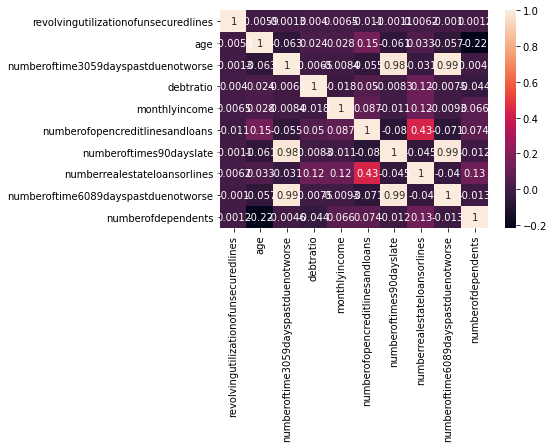

In [218]:
sns.heatmap(correlation_matrix, annot = True)

In [219]:
# outlier detection
train.describe()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
count,150000.00,150000.00,150000.00,150000.00,150000.00,150000.00,150000.00,150000.00,150000.00,150000.00,150000.00
mean,0.07,6.05,52.30,0.42,353.01,6418.45,8.45,0.27,1.02,0.24,0.74
std,0.25,249.76,14.77,4.19,2037.82,12890.40,5.15,4.17,1.13,4.16,1.11
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.03,41.00,0.00,0.18,3903.00,5.00,0.00,0.00,0.00,0.00
50%,0.00,0.15,52.00,0.00,0.37,5400.00,8.00,0.00,1.00,0.00,0.00
75%,0.00,0.56,63.00,0.00,0.87,7400.00,11.00,0.00,2.00,0.00,1.00
max,1.00,50708.00,109.00,98.00,329664.00,3008750.00,58.00,98.00,54.00,98.00,20.00


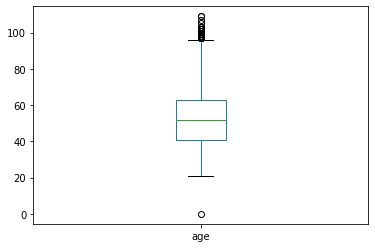

In [220]:
train.age.plot.box()

In [221]:
train.shape

(150000, 11)

In [222]:
# Percentile based outlier detection
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    (minval, maxval) = np.percentile(data, [diff, 100 - diff])
    #return minval, maxval
    return ((data < minval) | (data > maxval))

In [223]:
low = .03
high = .97
train_quant = train[['age', 'debtratio']].quantile([low, high])
print(train_quant)

       age  debtratio
0.03 27.00       0.00
0.97 81.00    3225.00


In [224]:
train.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.77,45,2,0.80,9120.00,13,0,6,0,2.00
1,0,0.96,40,0,0.12,2600.00,4,0,0,0,1.00
2,0,0.66,38,1,0.09,3042.00,2,1,0,0,0.00
3,0,0.23,30,0,0.04,3300.00,5,0,0,0,0.00
4,0,0.91,49,1,0.02,63588.00,7,0,1,0,0.00


In [225]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

seriousdlqin2yrs                          0.00
revolvingutilizationofunsecuredlines      0.53
age                                      22.00
numberoftime3059dayspastduenotworse       0.00
debtratio                                 0.69
monthlyincome                          3497.00
numberofopencreditlinesandloans           6.00
numberoftimes90dayslate                   0.00
numberrealestateloansorlines              2.00
numberoftime6089dayspastduenotworse       0.00
numberofdependents                        1.00
dtype: float64


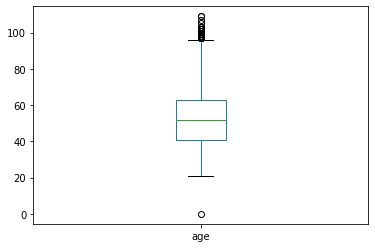

In [226]:
train.age.plot.box()

In [227]:
def outlier_replacement(x):
    lower = x.quantile(0.05)
    upper = x.quantile(0.95)
    x = np.where(x <lower, lower, x)
    x = np.where(x >upper, upper, x)
    return x

In [228]:
train['age'] = outlier_replacement(train['age'])

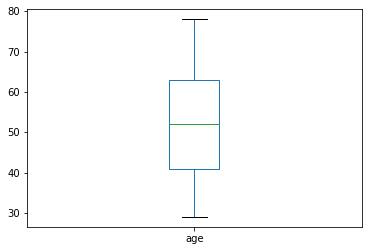

In [229]:
train.age.plot.box()

In [230]:
train['monthlyincome'] = outlier_replacement(train['monthlyincome'])

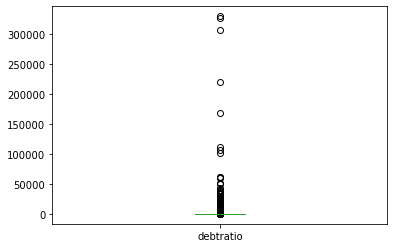

In [245]:
train.debtratio.plot.box()

In [232]:
train.describe()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
count,150000.00,150000.00,150000.00,150000.00,150000.00,150000.00,150000.00,150000.00,150000.00,150000.00,150000.00
mean,0.07,6.05,52.20,0.42,353.01,5964.00,8.45,0.27,1.02,0.24,0.74
std,0.25,249.76,13.94,4.19,2037.82,3090.91,5.15,4.17,1.13,4.16,1.11
min,0.00,0.00,29.00,0.00,0.00,1500.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.03,41.00,0.00,0.18,3903.00,5.00,0.00,0.00,0.00,0.00
50%,0.00,0.15,52.00,0.00,0.37,5400.00,8.00,0.00,1.00,0.00,0.00
75%,0.00,0.56,63.00,0.00,0.87,7400.00,11.00,0.00,2.00,0.00,1.00
max,1.00,50708.00,78.00,98.00,329664.00,13500.00,58.00,98.00,54.00,98.00,20.00


In [233]:
train['numberoftime3059dayspastduenotworse'] = outlier_replacement(train['numberoftime3059dayspastduenotworse'])

In [234]:
train['numberofopencreditlinesandloans'] = outlier_replacement(train['numberofopencreditlinesandloans'])

In [235]:
train['numberoftimes90dayslate'] = outlier_replacement(train['numberoftimes90dayslate'])

In [236]:
train['numberrealestateloansorlines'] = outlier_replacement(train['numberrealestateloansorlines'])

In [237]:
train['numberoftime6089dayspastduenotworse'] = outlier_replacement(train['numberoftime6089dayspastduenotworse'])

In [238]:
depNew = []
for var in train.numberofdependents:
    if var > 10:
        depNew.append(10)
    else:
        depNew.append(var)

In [239]:
train.numberofdependents = depNew

In [240]:
train.describe()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
count,150000.00,150000.00,150000.00,150000.00,150000.00,150000.00,150000.00,150000.00,150000.00,150000.00,150000.00
mean,0.07,6.05,52.20,0.21,353.01,5964.00,8.30,0.06,0.97,0.05,0.74
std,0.25,249.76,13.94,0.52,2037.82,3090.91,4.47,0.23,0.92,0.22,1.11
min,0.00,0.00,29.00,0.00,0.00,1500.00,2.00,0.00,0.00,0.00,0.00
25%,0.00,0.03,41.00,0.00,0.18,3903.00,5.00,0.00,0.00,0.00,0.00
50%,0.00,0.15,52.00,0.00,0.37,5400.00,8.00,0.00,1.00,0.00,0.00
75%,0.00,0.56,63.00,0.00,0.87,7400.00,11.00,0.00,2.00,0.00,1.00
max,1.00,50708.00,78.00,2.00,329664.00,13500.00,18.00,1.00,3.00,1.00,10.00


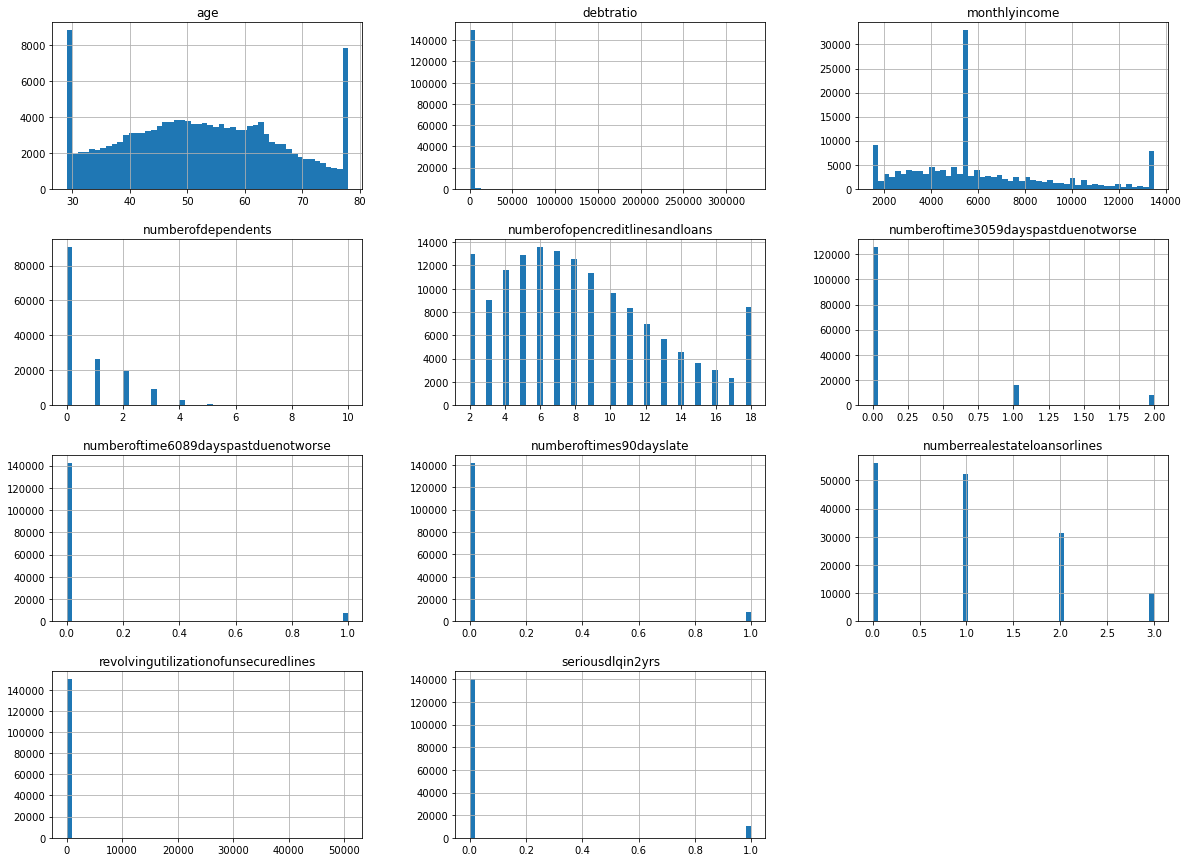

In [397]:
# quick histogram
train.hist(bins=50, figsize=(20,15))
plt.show()

In [399]:
train.corr()['seriousdlqin2yrs'].sort_values(ascending = False)

seriousdlqin2yrs                        1.00
numberoftimes90dayslate                 0.34
numberoftime3059dayspastduenotworse     0.28
numberoftime6089dayspastduenotworse     0.28
numberofdependents                      0.05
revolvingutilizationofunsecuredlines   -0.00
debtratio                              -0.01
numberrealestateloansorlines           -0.03
numberofopencreditlinesandloans        -0.03
monthlyincome                          -0.06
age                                    -0.12
Name: seriousdlqin2yrs, dtype: float64

In [400]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027D343899C8>,
      dtype=object)

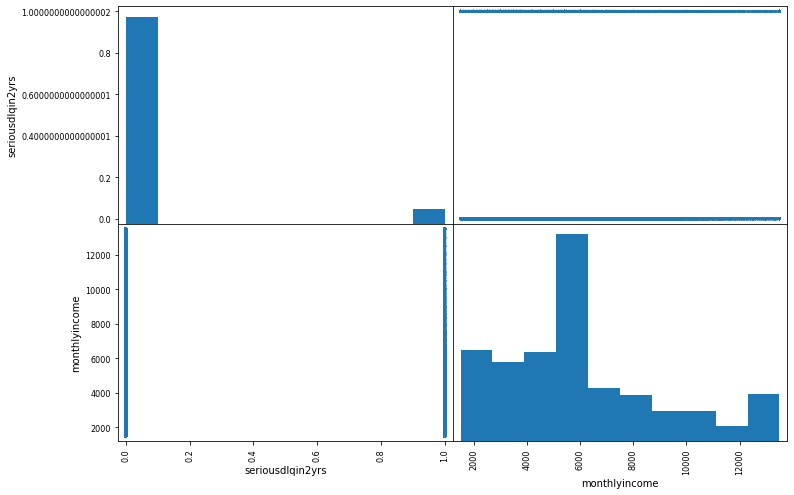

In [404]:

attributes = ["seriousdlqin2yrs", "monthlyincome"]
scatter_matrix(train[attributes], figsize=(12, 8))

# Feature Engineering

In [252]:
from sklearn.ensemble import RandomForestClassifier

In [254]:
train.columns

Index(['seriousdlqin2yrs', 'revolvingutilizationofunsecuredlines', 'age',
       'numberoftime3059dayspastduenotworse', 'debtratio', 'monthlyincome',
       'numberofopencreditlinesandloans', 'numberoftimes90dayslate',
       'numberrealestateloansorlines', 'numberoftime6089dayspastduenotworse',
       'numberofdependents'],
      dtype='object')

In [255]:
X = train.drop ('seriousdlqin2yrs', axis = 1)

In [256]:
y = train.seriousdlqin2yrs

In [257]:
feature_label = train.columns[1:]

In [261]:
model = RandomForestClassifier(n_estimators = 10000, random_state= 0, n_jobs = -1)

In [262]:
model.fit(X,y)

RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state=0)

In [264]:
importances = model.feature_importances_

In [265]:
importances

array([0.20823345, 0.12443235, 0.04147643, 0.20278521, 0.14776064,
       0.08145173, 0.07879918, 0.02872031, 0.04130842, 0.0450323 ])

In [284]:
indices = np.argsort(importances)[::-1]

In [285]:
for i in range(X.shape[1]):
    print("%d) %s %f" % (i+1, feature_label[i], importances[indices[i]]))

1) revolvingutilizationofunsecuredlines 0.208233
2) age 0.202785
3) numberoftime3059dayspastduenotworse 0.147761
4) debtratio 0.124432
5) monthlyincome 0.081452
6) numberofopencreditlinesandloans 0.078799
7) numberoftimes90dayslate 0.045032
8) numberrealestateloansorlines 0.041476
9) numberoftime6089dayspastduenotworse 0.041308
10) numberofdependents 0.028720


([<matplotlib.axis.XTick at 0x27d023f4e08>,
 [Text(0, 0, 'revolvingutilizationofunsecuredlines'),
  Text(0, 0, 'age'),
  Text(0, 0, 'numberoftime3059dayspastduenotworse'),
  Text(0, 0, 'debtratio'),
  Text(0, 0, 'monthlyincome'),
  Text(0, 0, 'numberofopencreditlinesandloans'),
  Text(0, 0, 'numberoftimes90dayslate'),
  Text(0, 0, 'numberrealestateloansorlines'),
  Text(0, 0, 'numberoftime6089dayspastduenotworse'),
  Text(0, 0, 'numberofdependents')])

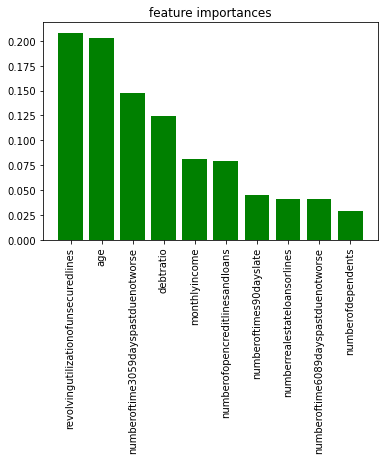

In [293]:
plt.title('feature importances')
plt.bar(range(X.shape[1]), importances[indices], color = 'green', align = 'center')
plt.xticks(range(X.shape[1]), feature_label, rotation = 90)

# ML Algorithms

In [294]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [295]:
X = train.drop('seriousdlqin2yrs', axis=1)
y = train.seriousdlqin2yrs

In [296]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# K-Nearest Neighbor (KNN)

In [297]:
knMod = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2,
                             metric='minkowski', metric_params=None)

In [298]:
knMod.fit(X_train, y_train)

KNeighborsClassifier()

In [299]:
knMod.score(X_test, y_test)

0.9306666666666666

In [300]:
test_labels=knMod.predict_proba(np.array(X_test.values))[:,1]

In [301]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.5689531829979944

# Logistic Regression

In [302]:
glmMod = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True,
                            intercept_scaling=1, class_weight=None, 
                            random_state=None, solver='liblinear', max_iter=100,
                            multi_class='ovr', verbose=2)

In [303]:
glmMod.fit(X_train, y_train)

[LibLinear]

LogisticRegression(multi_class='ovr', penalty='l1', solver='liblinear',
                   verbose=2)

In [304]:
glmMod.score(X_test, y_test)

0.9349866666666666

In [312]:
adaMod = AdaBoostClassifier(base_estimator=None, n_estimators=200, learning_rate=1.0)

In [313]:
adaMod.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=200)

In [314]:
adaMod.score(X_test, y_test)

0.93488

In [316]:
test_labels=adaMod.predict_proba(np.array(X_test.values))[:,1]

In [317]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8573172084728689

In [318]:

gbMod = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                   max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)

In [319]:
gbMod.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200)

In [320]:

gbMod.score(X_test, y_test)

0.9345866666666667

In [321]:
test_labels=gbMod.predict_proba(np.array(X_test.values))[:,1]

In [322]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8621901120368102

In [305]:
rfMod = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                               max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, 
                               random_state=None, verbose=0)

In [306]:
rfMod.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, n_jobs=1)

In [307]:
rfMod.score(X_test, y_test)

0.9313066666666666

In [308]:

test_labels=rfMod.predict_proba(np.array(X_test.values))[:,1]

In [309]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.7789125418606551

# Cross VAlidation

In [323]:
from sklearn.model_selection import cross_val_score
def cvDictGen(functions, scr, X_train=X, y_train=y, cv=5, verbose=1):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv=cv, verbose=verbose, scoring=scr)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    
    return cvDict

def cvDictNormalize(cvDict):
    cvDictNormalized = {}
    for key in cvDict.keys():
        for i in cvDict[key]:
            cvDictNormalized[key] = ['{:0.2f}'.format((cvDict[key][0]/cvDict[cvDict.keys()[0]][0])),
                                     '{:0.2f}'.format((cvDict[key][1]/cvDict[cvDict.keys()[0]][1]))]
    return cvDictNormalized

In [324]:
cvD = cvDictGen(functions=[knMod, glmMod, adaMod, gbMod, rfMod], scr='roc_auc')
cvD

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   14.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.1s finished


{'KNeighborsClassifier': [0.5724461803495169, 0.0023041517949197996],
 'LogisticRegression': [0.8214074983700181, 0.006227727941157671],
 'AdaBoostClassifier': [0.8588192335983875, 0.003063991848505957],
 'GradientBoostingClassifier': [0.8637263316422885, 0.003581010947939946],
 'RandomForestClassifier': [0.778944461641611, 0.003955880068613146]}

# Hyper parameter optimization using Randomized search


In [325]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [328]:

adaHyperParams = {'n_estimators': [10,50,100,200,420]}

In [330]:

gridSearchAda = RandomizedSearchCV(estimator=adaMod, param_distributions=adaHyperParams, n_iter=5,
                                   scoring='roc_auc',  cv=None, verbose=2).fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................. n_estimators=10, total=   0.7s
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] .................................. n_estimators=10, total=   0.9s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.7s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.7s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.7s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   3.3s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   3.2s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   3.2s
[CV] n_estimators=50 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  4.3min finished


In [334]:
gridSearchAda.best_params_,gridSearchAda.best_score_

({'n_estimators': 100}, 0.8586270988184065)

In [335]:

gbHyperParams = {'loss' : ['deviance', 'exponential'],
                 'n_estimators': randint(10, 500),
                 'max_depth': randint(1,10)}

In [337]:
gridSearchGB = RandomizedSearchCV(estimator=gbMod, param_distributions=gbHyperParams, n_iter=10,
                                   scoring='roc_auc',  cv=None, verbose=2).fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] loss=exponential, max_depth=2, n_estimators=278 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. loss=exponential, max_depth=2, n_estimators=278, total=  23.1s
[CV] loss=exponential, max_depth=2, n_estimators=278 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.0s remaining:    0.0s


[CV] .. loss=exponential, max_depth=2, n_estimators=278, total=  22.4s
[CV] loss=exponential, max_depth=2, n_estimators=278 .................
[CV] .. loss=exponential, max_depth=2, n_estimators=278, total=  22.7s
[CV] loss=exponential, max_depth=2, n_estimators=278 .................
[CV] .. loss=exponential, max_depth=2, n_estimators=278, total=  22.3s
[CV] loss=exponential, max_depth=2, n_estimators=278 .................
[CV] .. loss=exponential, max_depth=2, n_estimators=278, total=  22.3s
[CV] loss=exponential, max_depth=8, n_estimators=317 .................
[CV] .. loss=exponential, max_depth=8, n_estimators=317, total= 1.5min
[CV] loss=exponential, max_depth=8, n_estimators=317 .................
[CV] .. loss=exponential, max_depth=8, n_estimators=317, total= 1.5min
[CV] loss=exponential, max_depth=8, n_estimators=317 .................
[CV] .. loss=exponential, max_depth=8, n_estimators=317, total= 1.4min
[CV] loss=exponential, max_depth=8, n_estimators=317 .................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 41.4min finished


In [338]:

gridSearchGB.best_params_, gridSearchGB.best_score_

({'loss': 'exponential', 'max_depth': 2, 'n_estimators': 278},
 0.8632155511761432)

# Using new hyperparameter

In [339]:
bestGbModFitted = gridSearchGB.best_estimator_.fit(X_train, y_train)

In [340]:
bestAdaModFitted = gridSearchAda.best_estimator_.fit(X_train, y_train)

In [341]:
cvDictbestpara = cvDictGen(functions=[bestGbModFitted, bestAdaModFitted], scr='roc_auc')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   42.1s finished


In [342]:
cvDictbestpara

{'GradientBoostingClassifier': [0.8635637035518577, 0.003537649007353686],
 'AdaBoostClassifier': [0.8588615698021371, 0.0031970703730377073]}

In [343]:

test_labels=bestGbModFitted.predict_proba(np.array(X_test.values))[:,1]

In [344]:

roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8620212910778948

In [345]:
test_labels=bestAdaModFitted.predict_proba(np.array(X_test.values))[:,1]

In [346]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8574000846288582

In [347]:

import numpy as np
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p)
X_train_1 = np.array(X_train)
X_train_transform = transformer.transform(X_train_1)

In [348]:
bestGbModFitted_transformed = gridSearchGB.best_estimator_.fit(X_train_transform, y_train)

In [349]:
bestAdaModFitted_transformed = gridSearchAda.best_estimator_.fit(X_train_transform, y_train)

In [350]:
cvDictbestpara_transform = cvDictGen(functions=[bestGbModFitted_transformed, bestAdaModFitted_transformed],
                                     scr='roc_auc')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   42.4s finished


In [351]:
cvDictbestpara_transform

{'GradientBoostingClassifier': [0.8635666823524006, 0.003536497467003049],
 'AdaBoostClassifier': [0.8588615698021371, 0.0031970703730377073]}

In [352]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p)
X_test_1 = np.array(X_test)
X_test_transform = transformer.transform(X_test_1)

In [353]:
test_labels=bestGbModFitted_transformed.predict_proba(np.array(X_test_transform))[:,1]

In [354]:

roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8620212910778948

In [355]:

test_labels=bestAdaModFitted_transformed.predict_proba(np.array(X_test_transform))[:,1]

In [356]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8574000846288582

In [357]:
from sklearn.ensemble import VotingClassifier
votingMod = VotingClassifier(estimators=[('gb', bestGbModFitted_transformed), 
                                         ('ada', bestAdaModFitted_transformed)], voting='soft',weights=[2,1])
votingMod = votingMod.fit(X_train_transform, y_train)

In [358]:
test_labels=votingMod.predict_proba(np.array(X_test_transform))[:,1]

In [359]:
votingMod.score(X_test_transform, y_test)

0.9354933333333333

In [360]:

roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.861956781426121

In [361]:

from sklearn.ensemble import VotingClassifier
votingMod_old = VotingClassifier(estimators=[('gb', bestGbModFitted), ('ada', bestAdaModFitted)], 
                                 voting='soft',weights=[2,1])
votingMod_old = votingMod.fit(X_train, y_train)

In [362]:

test_labels=votingMod_old.predict_proba(np.array(X_test.values))[:,1]

In [363]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.861956781426121

In [372]:
# Read Training dataset as well as drop the index column
test = pd.read_csv('../data/cs-test.csv').drop('Unnamed: 0', axis = 1)
# For each column heading we replace "-" and convert the heading in lowercase 
cleancolumn = []
for i in range(len(test.columns)):
    cleancolumn.append(test.columns[i].replace('-', '').lower())
test.columns = cleancolumn

In [373]:
test.drop(['seriousdlqin2yrs'], axis=1, inplace=True)
test.fillna((train.median()), inplace=True)

In [374]:
test_labels_votingMod_old = votingMod_old.predict_proba(np.array(test.values))[:,1]
print (len(test_labels_votingMod_old))

101503


In [380]:
output = pd.DataFrame({'ID':test.index, 'probability':test_labels_votingMod_old})

In [383]:
output

,ID,probability
0,0,0.21
1,1,0.19
2,2,0.17
3,3,0.21
4,4,0.23
...,...,...
101498,101498,0.18
101499,101499,0.36
101500,101500,0.17
101501,101501,0.20


In [388]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p)
test_data_temp = np.array(test)
test_data_transform = transformer.transform(test_data_temp)

In [390]:

test_labels_votingMod = votingMod.predict_proba(np.array(test.values))[:,1]
print (len(test_labels_votingMod_old))

101503


In [392]:

output = pd.DataFrame({'ID':test.index, 'probability':test_labels_votingMod})

In [393]:
output

,ID,probability
0,0,0.21
1,1,0.19
2,2,0.17
3,3,0.21
4,4,0.23
...,...,...
101498,101498,0.18
101499,101499,0.36
101500,101500,0.17
101501,101501,0.20
